In [3]:
import numpy as np
import os
import cv2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Load MNIST images and preprocess
image_dir = "./"  # Change this to the directory containing your MNIST images
image_files = sorted([file for file in os.listdir(image_dir) if file.endswith('.png')])

images = []
for file in image_files:
    img = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize images to 28x28
    img = img.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    images.append(img)

images = np.array(images)
images = np.expand_dims(images, axis=-1)  # Add channel dimension

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=128, shuffle=True)

# Extract features using the encoder part of the autoencoder
encoder = Model(input_img, encoded)
encoded_images = encoder.predict(images)

# Extracted features (encoded images) are stored in the 'encoded_images' array


Epoch 1/50
4/4 [==============================] - 2s 70ms/step - loss: 0.6377
Epoch 2/50
4/4 [==============================] - 0s 55ms/step - loss: 0.6092
Epoch 3/50
4/4 [==============================] - 0s 55ms/step - loss: 0.5783
Epoch 4/50
4/4 [==============================] - 0s 55ms/step - loss: 0.5428
Epoch 5/50
4/4 [==============================] - 0s 55ms/step - loss: 0.5010
Epoch 6/50
4/4 [==============================] - 0s 55ms/step - loss: 0.4521
Epoch 7/50
4/4 [==============================] - 0s 55ms/step - loss: 0.3981
Epoch 8/50
4/4 [==============================] - 0s 52ms/step - loss: 0.3449
Epoch 9/50
4/4 [==============================] - 0s 56ms/step - loss: 0.2996
Epoch 10/50
4/4 [==============================] - 0s 55ms/step - loss: 0.2659
Epoch 11/50
4/4 [==============================] - 0s 56ms/step - loss: 0.2408
Epoch 12/50
4/4 [==============================] - 0s 54ms/step - loss: 0.2202
Epoch 13/50
4/4 [==============================] - 0s 57ms/st

In [5]:
print(encoded_images.shape)

(500, 7, 7, 8)


16/16 [==============================] - 0s 7ms/step


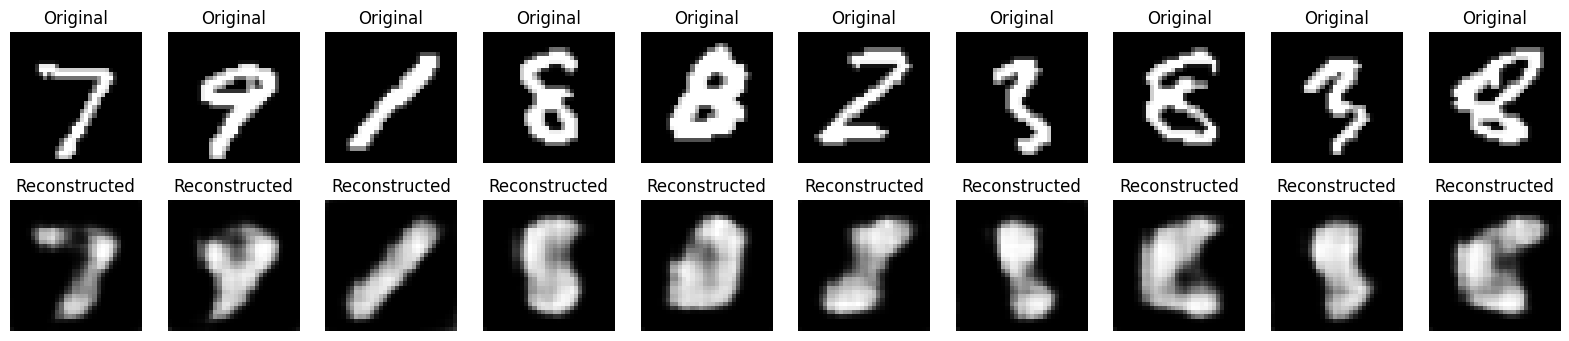

In [6]:
import matplotlib.pyplot as plt

# ... (previous code)

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.predict(images)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(32, 32), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(32, 32), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


In [3]:
import numpy as np
import os
import cv2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Load MNIST images and preprocess
image_dir = "./"  # Change this to the directory containing your MNIST images
image_files = sorted([file for file in os.listdir(image_dir) if file.endswith('.png')])

images = []
for file in image_files:
    img = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))  # Resize images to 28x28
    img = img.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    images.append(img)

images = np.array(images)
images = np.expand_dims(images, axis=-1)  # Add channel dimension
# Define the convolutional autoencoder architecture with a deeper encoder
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder (can remain the same)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model (compile and train as before)
# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder

# Train the autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=128, shuffle=True)

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.predict(images)


# Extract features using the encoder part of the autoencoder
encoder = Model(input_img, encoded)
encoded_images = encoder.predict(images)

# Extracted features (encoded images) are stored in the 'encoded_images' array


Epoch 1/50
4/4 [==============================] - 2s 70ms/step - loss: 0.6900
Epoch 2/50
4/4 [==============================] - 0s 68ms/step - loss: 0.6657
Epoch 3/50
4/4 [==============================] - 0s 70ms/step - loss: 0.6278
Epoch 4/50
4/4 [==============================] - 0s 68ms/step - loss: 0.5754
Epoch 5/50
4/4 [==============================] - 0s 74ms/step - loss: 0.5590
Epoch 6/50
4/4 [==============================] - 0s 69ms/step - loss: 0.5348
Epoch 7/50
4/4 [==============================] - 0s 67ms/step - loss: 0.5028
Epoch 8/50
4/4 [==============================] - 0s 68ms/step - loss: 0.4759
Epoch 9/50
4/4 [==============================] - 0s 66ms/step - loss: 0.4429
Epoch 10/50
4/4 [==============================] - 0s 68ms/step - loss: 0.4079
Epoch 11/50
4/4 [==============================] - 0s 67ms/step - loss: 0.3714
Epoch 12/50
4/4 [==============================] - 0s 65ms/step - loss: 0.3358
Epoch 13/50
4/4 [==============================] - 0s 68ms/st

In [4]:
print(encoded_images.shape)

(500, 4, 4, 4)
